# Introduction to Complexity

## Section 2

### Iteration: Population Growth

$n_1 = birthrate \times n_0$

$n_2 = birthrate \times n_1$

Generalizing, we get the model:

$n_{t + 1} = birthrate \times n_t$

Lecture Question:

In [1]:
3^4;

(%o2)                                 81

#### Linear Model

We'll use Maxima's Lisp support to explore our models.

In [2]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [3]:
(defun ->maxima (data)
  (cons '(mlist) 
        (map 'list (lambda (x) `((mlist) ,@x)) data)))

(defun $population (x0 rate n)
  (labels ((pop0 (acc)
    (let ((step (length acc)))
      (if (eql step n) 
        (->maxima acc)
        (let ((x-last (cadar (last acc))))
          (pop0 (append acc `((,step ,(* rate x-last))))))))))
   (pop0 `((0 ,x0)))))

->MAXIMA

$POPULATION

In [4]:
(to-maxima)

Returning to Maxima


In [5]:
pop_0: 1$
birthrate: 2$
steps: 4$
population(pop_0, birthrate, steps);

(%o7)                  [[0, 1], [1, 2], [2, 4], [3, 8]]

In [6]:
pop_0: 10$
population(pop_0, birthrate, steps);

(%o9)                [[0, 10], [1, 20], [2, 40], [3, 80]]

In [7]:
xy0: population(1, 2, 11)$

In [8]:
set_plot_option([svg_file, "maxplot.svg"])$

In [9]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [10]:
(defun maxima-> (data)
  (mapcar (lambda (x) (cdr x)) (cdr data)))
  
(defun $max_x (data)
  (apply #'max (mapcar #'car (maxima-> data))))
  
(defun $max_y (data)
  (apply #'max (mapcar #'cadr (maxima-> data))))

MAXIMA->

$MAX_X

$MAX_Y

In [11]:
(to-maxima)

Returning to Maxima


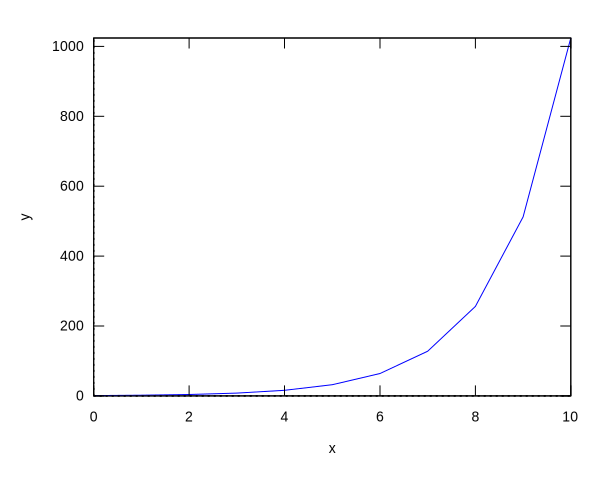

In [12]:
data: xy0$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

In [13]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [14]:
(defun $population_year_over_year (data)
  (labels ((pyoy0 (acc last-year remaining)
    (if (null remaining) 
      (->maxima acc)
      (let ((this-year (cadar remaining)))
        (pyoy0 (append acc `((,last-year ,this-year))) this-year (cdr remaining))))))
    (pyoy0 '() 0 (maxima-> data))))

$POPULATION_YEAR_OVER_YEAR

In [15]:
(to-maxima)

Returning to Maxima


In [16]:
xy1: population_year_over_year(xy0);

(%o16) [[0, 1], [1, 2], [2, 4], [4, 8], [8, 16], [16, 32], [32, 64], 
                                [64, 128], [128, 256], [256, 512], [512, 1024]]

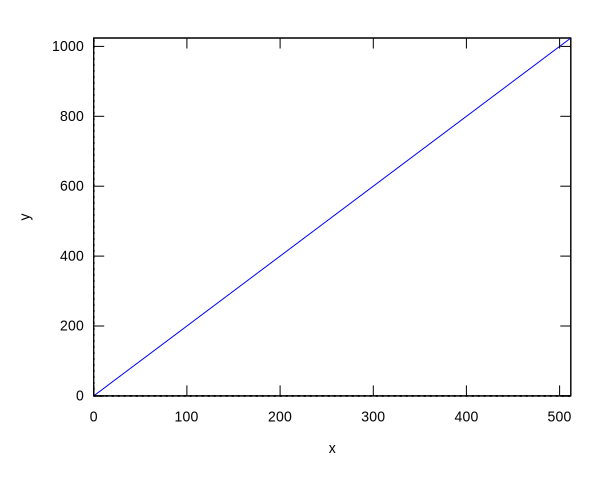

In [17]:
data: xy1$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

#### Non-linear Model

Adding deaths due to overcrowding:

$n_{t + 1} = birthrate \times (n_t - deaths_{overcrowded})$

$deaths_{overcrowded} = \frac {{n_t}^2} {population_{max}}$

Adding mortality rate to that:

$n_{t + 1} = (birthrate - deathrate) \times (n_t - deaths_{overcrowded})$

This is called the "Logistic Model"

In [18]:
to_lisp()$


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [19]:
(defun R (b-rate d-rate)
  (- b-rate d-rate))

(defun overcrowded-deaths (x-last K)
  (/ (expt x-last 2) K))

(defun growth (b-rate d-rate x-last K)
  (* (R b-rate d-rate)
     (- x-last (overcrowded-deaths x-last K))))
  
(defun $logistic_model (x0 b-rate d-rate K n)
  (labels ((p0 (acc)
    (let ((step (length acc)))
      (if (eql step n) 
        (->maxima acc)
        (let ((x-last (cadar (last acc))))
          (p0 (append acc `((,step ,(growth b-rate d-rate x-last K))))))))))
   (p0 `((0 ,x0)))))

R

OVERCROWDED-DEATHS

GROWTH

$LOGISTIC_MODEL

In [20]:
(to-maxima)

Returning to Maxima


In [21]:
pop_0: 1$
birthrate: 2.0$
deathrate: 0.0$
carrying_capacity: 50.0$
steps: 20$
xy2: logistic_model(pop_0, birthrate, deathrate, carrying_capacity, steps);

(%o25) [[0, 1], [1, 1.96], [2, 3.766336], [3, 6.96526052540416], 
[4, 11.98992688333818], [5, 18.22951989996454], [6, 23.16642396860095], 
[7, 24.86551995748316], [8, 24.99927660472659], [9, 24.99999997906797], 
[10, 25.0], [11, 25.0], [12, 25.0], [13, 25.0], [14, 25.0], [15, 25.0], 
[16, 25.0], [17, 25.0], [18, 25.0], [19, 25.0]]

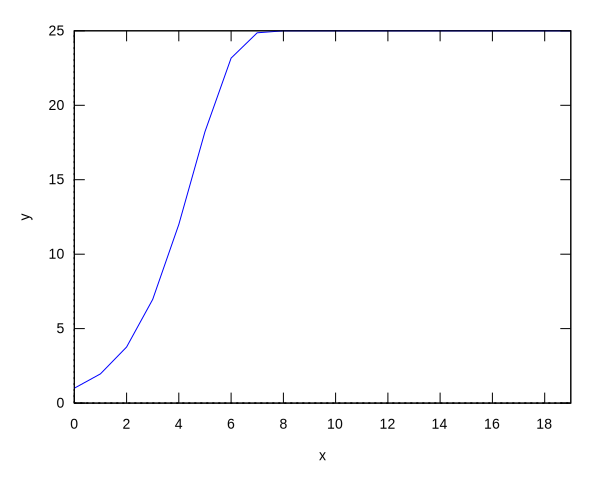

In [22]:
data: xy2$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

In [23]:
xy3: population_year_over_year(xy2)$

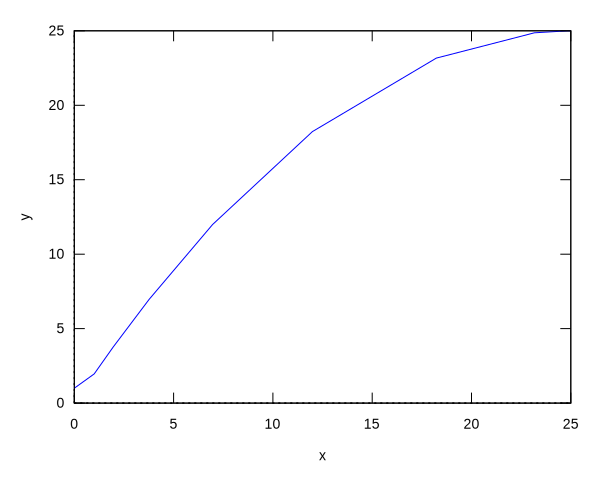

In [24]:
data: xy3$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

In [25]:
pop_0: 1$
birthrate: 2.5$
deathrate: 0.0$
carrying_capacity: 50.0$
steps: 10$
xy4: logistic_model(pop_0, birthrate, deathrate, carrying_capacity, steps);

(%o36) [[0, 1], [1, 2.45], [2, 5.824875], [3, 12.86572906171875], 
[4, 23.88797343981915], [5, 31.18816984647262], [6, 29.33532769756035], 
[7, 30.31024668773831], [8, 29.84006400576821], [9, 30.07868902100335]]

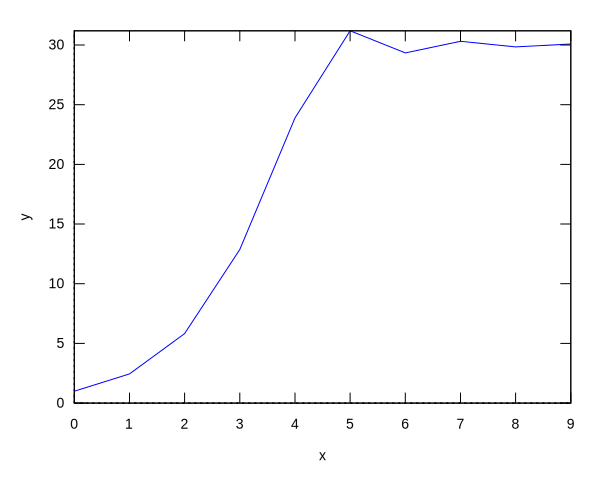

In [26]:
data: xy4$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

#### Logistic Map

In [27]:
to_lisp();


Type (to-maxima) to restart, ($quit) to quit Maxima.


In [28]:
(defun l-map (R x-last)
  (* R (- x-last (expt x-last 2))))

(defun $logistic_map (R x0 n)
  (labels ((lm0 (acc)
    (let ((step (length acc)))
      (if (eql step n) 
        (->maxima acc)
        (let ((x-last (cadar (last acc))))
          (lm0 (append acc `((,step ,(l-map R x-last))))))))))
   (lm0 `((0 ,x0)))))

L-MAP

$LOGISTIC_MAP

In [29]:
(to-maxima)

Returning to Maxima


In [30]:
R: 2$
x0: 0.2$
steps: 10$
xy5: logistic_map(R, x0, steps);

(%o43) [[0, 0.2], [1, 0.32], [2, 0.4352], [3, 0.49160192], 
[4, 0.4998589445046272], [5, 0.4999999602066945], [6, 0.4999999999999968], 
[7, 0.5], [8, 0.5], [9, 0.5]]

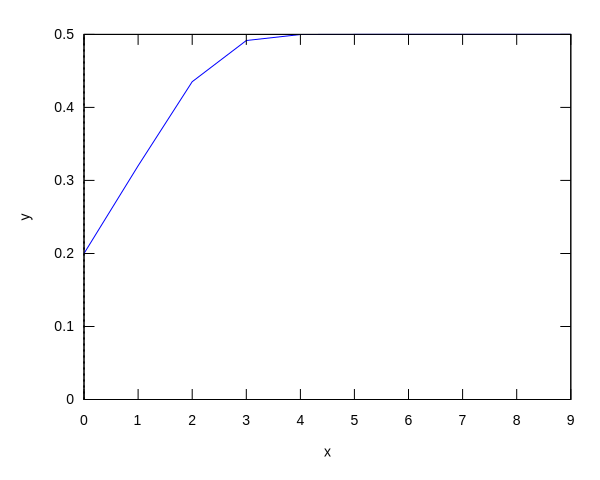

In [31]:
data: xy5$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

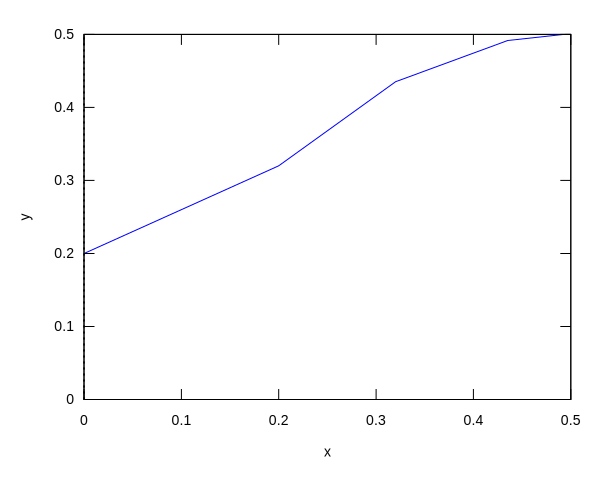

(%o46) [[0, 0.2], [0.2, 0.32], [0.32, 0.4352], [0.4352, 0.49160192], 
[0.49160192, 0.4998589445046272], [0.4998589445046272, 0.4999999602066945], 
[0.4999999602066945, 0.4999999999999968], [0.4999999999999968, 0.5], 
[0.5, 0.5], [0.5, 0.5]]

In [32]:
xy6: population_year_over_year(xy5);
data: xy6$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

In [33]:
R: 2$
x0: 0.8$
steps: 10$
xy7: logistic_map(R, x0, steps);

(%o52) [[0, 0.8], [1, 0.3199999999999998], [2, 0.4351999999999999], 
[3, 0.49160192], [4, 0.4998589445046272], [5, 0.4999999602066945], 
[6, 0.4999999999999968], [7, 0.5], [8, 0.5], [9, 0.5]]

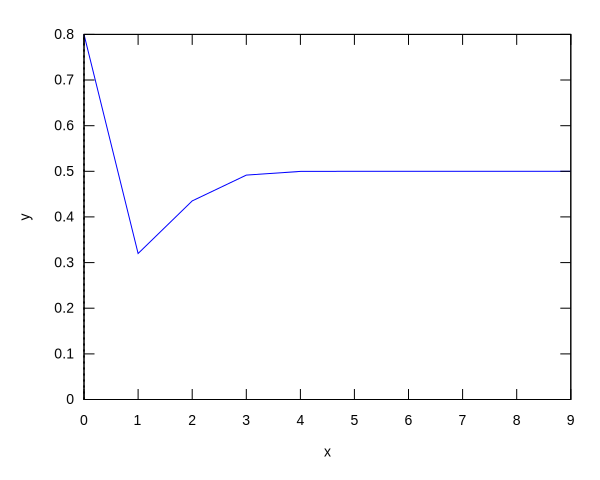

In [34]:
data: xy7$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

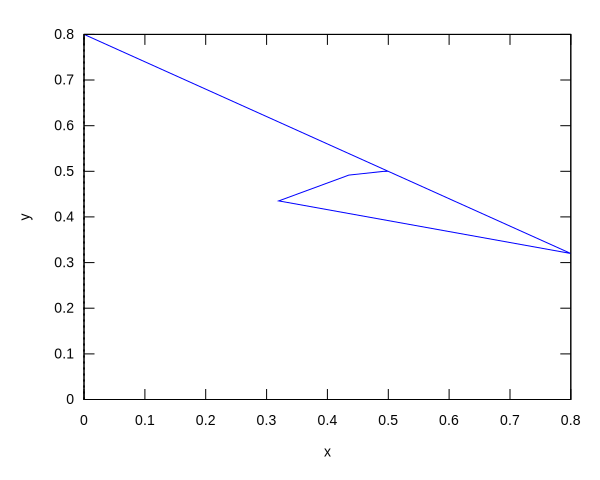

(%o55) [[0, 0.8], [0.8, 0.3199999999999998], 
[0.3199999999999998, 0.4351999999999999], [0.4351999999999999, 0.49160192], 
[0.49160192, 0.4998589445046272], [0.4998589445046272, 0.4999999602066945], 
[0.4999999602066945, 0.4999999999999968], [0.4999999999999968, 0.5], 
[0.5, 0.5], [0.5, 0.5]]

In [35]:
xy8: population_year_over_year(xy7);
data: xy8$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

In [36]:
R: 2.5$
x0: 0.2$
steps: 10$
xy9: logistic_map(R, x0, steps);

(%o61) [[0, 0.2], [1, 0.4], [2, 0.6], [3, 0.6], [4, 0.6], [5, 0.6], [6, 0.6], 
                                                  [7, 0.6], [8, 0.6], [9, 0.6]]

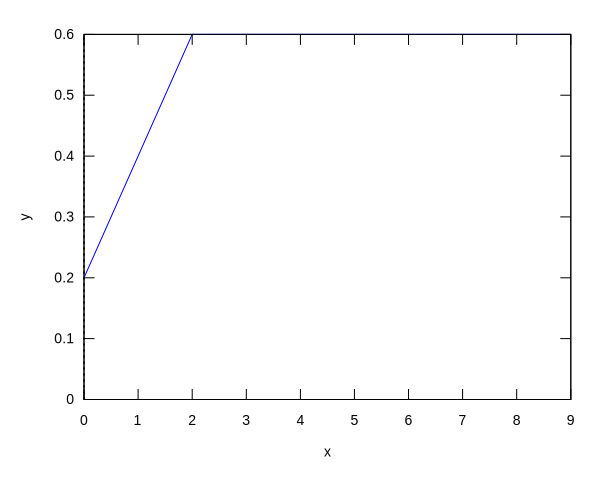

In [37]:
data: xy9$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$

In [42]:
R: 2.8$
x0: 0.2$
steps: 30$
xy10: logistic_map(R, x0, steps);

(%o81) [[0, 0.2], [1, 0.448], [2, 0.6924288], [3, 0.596319239405568], 
[4, 0.674023291536932], [5, 0.6152045032074255], [6, 0.6628381828340447], 
[7, 0.6257544333916575], [8, 0.6557203029505609], [9, 0.6321033242971594], 
[10, 0.6511363927869906], [11, 0.6360418141709421], [12, 0.6481793494318209], 
[13, 0.6385200651254944], [14, 0.6462741363613606], [15, 0.6400908556888667], 
[16, 0.6450487460266111], [17, 0.6410904115731014], [18, 0.644261788133972], 
[19, 0.641727902156289], [20, 0.6437569649010566], [21, 0.6421350181188218], 
[22, 0.6434333825482141], [23, 0.6423952213581774], [24, 0.6432260826161958], 
[25, 0.6425616099235721], [26, 0.6430933246527979], [27, 0.6426680412314651], 
[28, 0.6430083240312954], [29, 0.6427361339217281]]

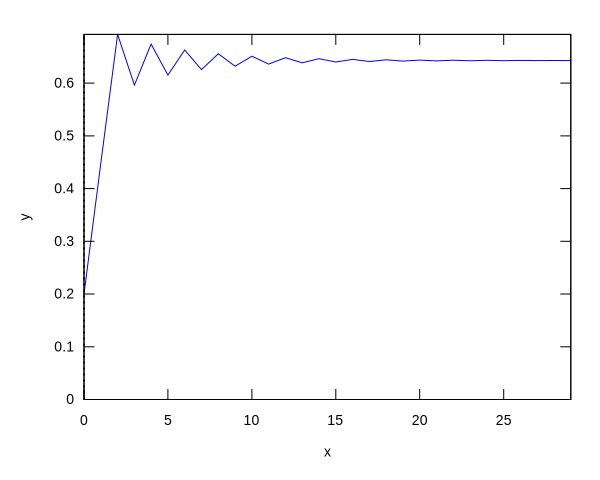

In [43]:
data: xy10$
plot2d([[discrete,data]], [x, 0, max_x(data)], [y, 0, max_y(data)])$